# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [4]:
import tensorflow
tensorflow.__version__

'2.0.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [0]:
#### Add your code here ####
import os
os.chdir('/content/drive/My Drive')

In [7]:
!ls

'Aligned Face Dataset from Pinterest.zip'
'APAR Form-NishantPatil 2013-14 JTO.doc'
'both omni used trace (1).txt.gdoc'
'both omni used trace.txt'
'both omni used trace.txt.gdoc'
'CDOT PH II UPDATE'
'Colab Notebooks'
'Consignee Change (28.09.2017).pdf'
 CV_Nishant.doc
 dentity_card_and_Acknowledgement_card.gdoc
 DLCP
 EAadhaar_1171260323080120130112105156_15092013172602_316106.pdf
 Files_required_for_face_detection.zip
'FinTech Sample Submission.gslides'
'FinTech Sample Submission.pptx'
 images.npy
'Ims System Network Element start and shutdown command.docx'
'Ims System Network Element start and shutdown command.docx.gdoc'
'IPMS 16-17 for ES&IT faculty_final.xls'
 MAXNG-NGEMS-CORE-AGENT-INSTALLATION.doc
 MAXNG-NGEMS-MGR-RELEASE-INSTALLATION.odt
 MXNG-PI-INST-IEMS.doc
'Nishant Resume.docx'
 Nishant_Resume.docx
'Nishant Resume - Nishant Patil.docx'
'Nishant_Resume - Nishant Patil.docx'
 OFFICE
 sign.gdoc
 SPOC.xlsx
'Untitled document.gdoc'
 Updated_Suryansh_Saxena_Resume.gdoc
 Updated_Sur

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
#### Add your code here ####
#path = "/content/drive/My Drive/Aligned Face Dataset from Pinterest.zip"
import zipfile
#This extracts the files to the current working directory
archive = zipfile.ZipFile('Aligned Face Dataset from Pinterest.zip', 'r')
archive.extractall()


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('pins/PINS')

In [56]:
metadata[0]

pins/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    print(path)
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [62]:
metadata[0].image_path()

'pins/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg'

pins/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


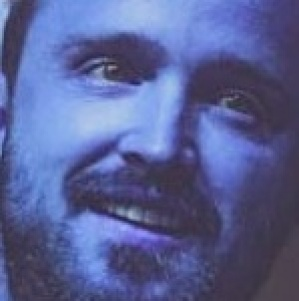

In [63]:
#### Add your code here ####
from google.colab.patches import cv2_imshow
img = load_image(metadata[0].image_path())
cv2_imshow(img)



### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
#### Add your code here ####
model = vgg_face()
#### Add your code here ####
model.load_weights('vgg_face_weights.h5')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [64]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
#print(img_path)
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

print(embedding_vector.shape)
print(metadata[0].name)

pins/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
(224, 224, 3)
(2622,)
pins_Aaron Paul


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [65]:
img_path = metadata[0].image_path()
img_path

'pins/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg'

In [0]:
#### Add your code here ####
embeddings = []
for item in range(0,len(metadata)):
  img_path = metadata[item].image_path()
  img = load_image(img_path)
  #print(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)

  img = cv2.resize(img, dsize = (224,224))
#print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  embeddings.append(embedding_vector)


In [84]:
print(len(embeddings))
print(embedding_vector.shape)
embeddings[0],len(metadata),metadata.shape[0]

10770
(2622,)


(array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
         0.00219081, -0.00908097], dtype=float32), 10770, 10770)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

pins/PINS/pins_Aaron Paul/Aaron Paul101_248.jpg
pins/PINS/pins_Aaron Paul/Aaron Paul101_249.jpg
pins/PINS/pins_Aaron Paul/Aaron Paul101_248.jpg
pins/PINS/pins_Amanda Crew/Amanda Crew100.jpg
pins/PINS/pins_Aaron Paul/Aaron Paul173_292.jpg
pins/PINS/pins_Aaron Paul/Aaron Paul174_216.jpg
pins/PINS/pins_Aaron Paul/Aaron Paul173_292.jpg
pins/PINS/pins_Alvaro Morte/Alvaro Morte144_795.jpg
pins/PINS/pins_Aaron Paul/Aaron Paul66_272.jpg
pins/PINS/pins_Aaron Paul/Aaron Paul74_211.jpg
pins/PINS/pins_Aaron Paul/Aaron Paul66_272.jpg
pins/PINS/pins_Alvaro Morte/Alvaro Morte173_818.jpg


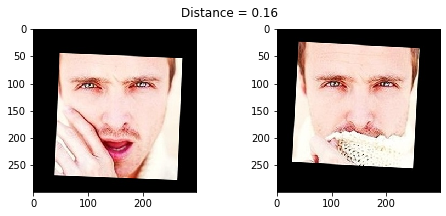

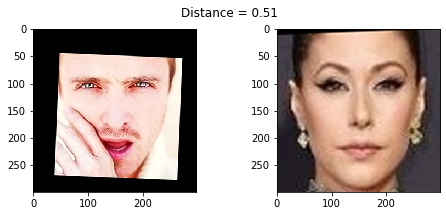

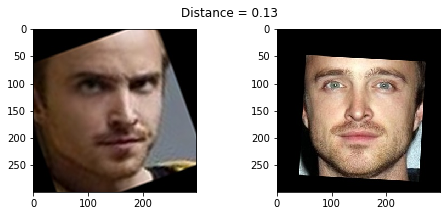

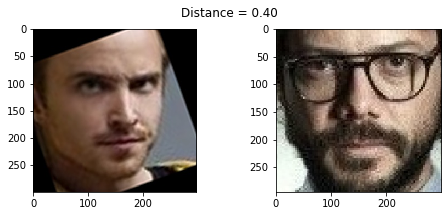

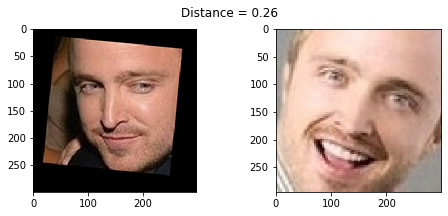

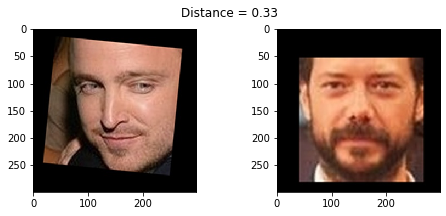

In [72]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [80]:
len(train_idx[train_idx==True]),len(test_idx[test_idx==True]),metadata.shape

(9573, 1197, (10770,))

In [91]:
#### Add your code here ####  
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(metadata.shape[0]):

  if train_idx[i]==True:
    X_train.append(embeddings[i])
    y_train.append(metadata[i].name)
  elif test_idx[i]==True:
    X_test.append(embeddings[i])
    y_test.append(metadata[i].name)
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))
print(y_test[0],y_train[0])


9573 1197
9573 1197
pins_Aaron Paul pins_Aaron Paul


### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder
#### Add your code here ####
out_encoder = LabelEncoder()
out_encoder.fit(y_train)
train_y = out_encoder.transform(y_train)
test_y = out_encoder.transform(y_test)

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#### Add your code here ####
scaler.fit(X_train)
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

#### Add your code here ####
pca = PCA()
pca.fit(train_X)
Train_X = pca.transform(train_X)
Test_X = pca.transform(test_X)


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#### Add your code here ####
svc = SVC()
svc.fit(Train_X,train_y)
# predict
yhat_train = svc.predict(Train_X)
yhat_test = svc.predict(Test_X)
# score
score_train = accuracy_score(train_y, yhat_train)
score_test = accuracy_score(test_y, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=99.760, test=96.157


### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

pins/PINS/pins_Alvaro Morte/Alvaro Morte111_820.jpg


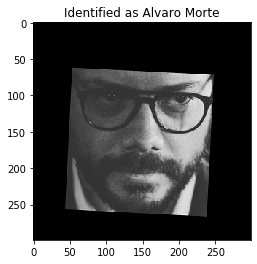

In [148]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = yhat_test #### Add your code here ####
example_identity = out_encoder.inverse_transform(example_prediction)[10]
example_identity = example_identity.split('_')[1]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

pins/PINS/pins_Amanda Crew/Amanda Crew100.jpg


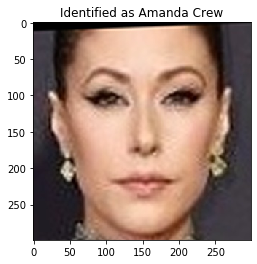

In [147]:
example_idx = 20

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = yhat_test #### Add your code here ####
example_identity = out_encoder.inverse_transform(example_prediction)[20]
example_identity = example_identity.split('_')[1]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

pins/PINS/pins_Bryan Cranston/Bryan Cranston166_1265.jpg


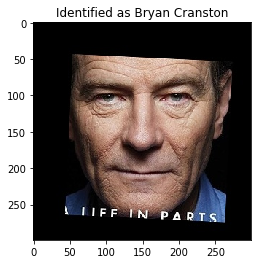

In [149]:
example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = yhat_test #### Add your code here ####
example_identity = out_encoder.inverse_transform(example_prediction)[100]
example_identity = example_identity.split('_')[1]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');